<a href="https://colab.research.google.com/github/atulnandakashyap/Time-Series/blob/main/Time%20Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [60]:
company = 'TATAELXSI.NS'

# Read Stock Price Data 
df = yf.download(company)

[*********************100%***********************]  1 of 1 completed


In [61]:
display(df.head(2), df.tail(2))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,57.974998,58.000000,56.775002,57.400002,36.670975,471000
2002-07-02,57.000000,57.450001,55.750000,56.500000,36.095989,342572


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-23,6510.0,6524.899902,6415.000000,6484.500000,6484.500000,78315
2023-02-24,6514.0,6519.899902,6440.200195,6459.149902,6459.149902,33142


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5134 entries, 2002-07-01 to 2023-02-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5134 non-null   float64
 1   High       5134 non-null   float64
 2   Low        5134 non-null   float64
 3   Close      5134 non-null   float64
 4   Adj Close  5134 non-null   float64
 5   Volume     5134 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 280.8 KB


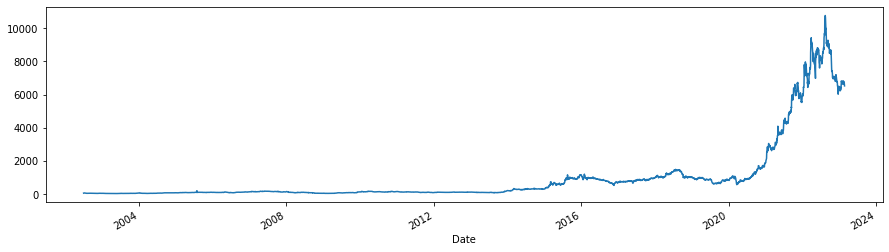

In [63]:
df["High"].plot(figsize=(15,4))
plt.show()

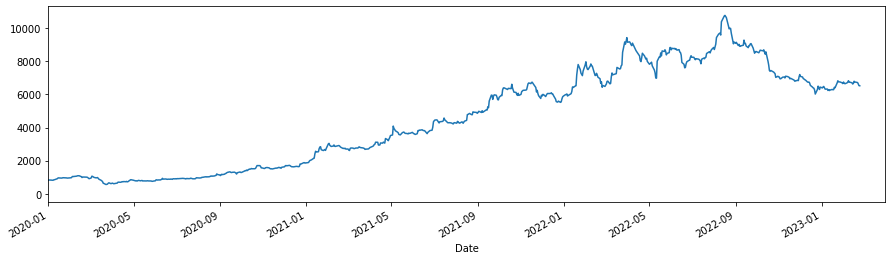

In [67]:
df["High"].plot(figsize=(15,4), xlim=["2020-01-01","2023-04-01"])
plt.show()

In [105]:
# rule A - yearly frequency
df_yearly_min = df.resample(rule="A").min() # yearly minimum
df_yearly_min.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-12-31,41.674999,42.000000,39.599998,41.125000,26.273409,0
2003-12-31,32.549999,32.900002,30.575001,32.474998,20.747208,0
2004-12-31,36.599998,37.250000,35.000000,36.924999,23.590164,0
2005-12-31,73.000000,74.125000,70.550003,72.525002,47.993061,0
2006-12-31,74.925003,75.125000,73.250000,74.474998,51.522083,25122


In [106]:
df_yearly_max = df.resample(rule="A").max() # yearly max

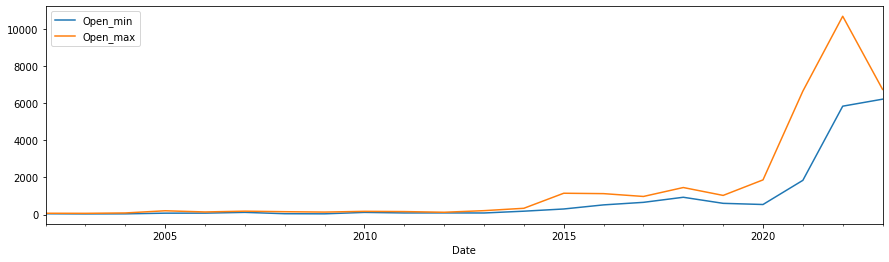

In [107]:
plt.figure(figsize=(15,4))
df_yearly_min["Open"].plot(label="Open_min")
df_yearly_max["Open"].plot(label="Open_max")
plt.legend()
plt.show()

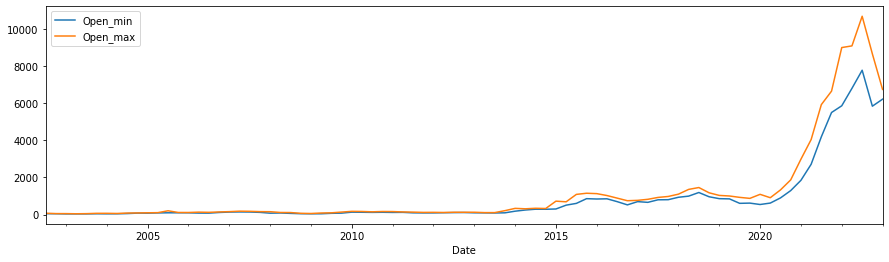

In [113]:
# QS - quaterly frequency
# W - weekly frequency
# D - daily frequency

df_daily_min = df.resample(rule="QS").min()
df_daily_max = df.resample(rule="QS").max()

plt.figure(figsize=(15,4))
df_daily_min["Open"].plot(label="Open_min")
df_daily_max["Open"].plot(label="Open_max")
plt.legend()
plt.show()

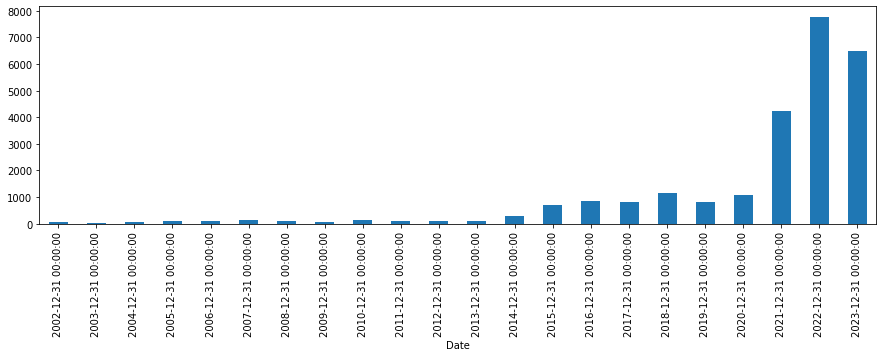

In [119]:
df["Open"].resample(rule="A").mean().plot(kind="bar", figsize=(15,4))
plt.show()

In [122]:
df["High"].rolling(7).mean().head(20)

Date
2002-07-01          NaN
2002-07-02          NaN
2002-07-03          NaN
2002-07-04          NaN
2002-07-05          NaN
2002-07-08          NaN
2002-07-09    64.207142
2002-07-10    65.271428
2002-07-11    66.049999
2002-07-12    66.146428
2002-07-15    65.857142
2002-07-16    64.771428
2002-07-17    63.085714
2002-07-18    61.960715
2002-07-19    61.089286
2002-07-22    60.103572
2002-07-23    59.421429
2002-07-24    58.510714
2002-07-25    58.196429
2002-07-26    57.739286
Name: High, dtype: float64

In [137]:
# rolling mean of 30 days
df["Open_7_days_rolling"] = df["Open"].rolling(7).mean()
df["Open_30_days_rolling"] = df["Open"].rolling(30).mean()
df["Open_90_days_rolling"] = df["Open"].rolling(90).mean()
df

,Open,High,Low,Close,Adj Close,Volume,Open_30_days_rolling,Open_7_days_rolling,Open_90_days_rolling
Date,,,,,,,,,
2002-07-01,57.974998,58.000000,56.775002,57.400002,36.670975,471000,NaN,NaN,NaN
2002-07-02,57.000000,57.450001,55.750000,56.500000,36.095989,342572,NaN,NaN,NaN
2002-07-03,56.450001,62.325001,56.450001,61.750000,39.450043,3909024,NaN,NaN,NaN
2002-07-04,62.400002,65.224998,60.849998,63.150002,40.344452,4254082,NaN,NaN,NaN
2002-07-05,63.450001,68.000000,62.775002,67.224998,42.947838,5105978,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-02-20,6666.049805,6720.000000,6625.000000,6666.899902,6666.899902,68365,6516.853337,6653.021415,6751.423345
2023-02-21,6699.000000,6712.200195,6645.250000,6661.750000,6661.750000,56129,6531.153337,6651.449986,6732.738341
2023-02-22,6610.000000,6619.899902,6500.000000,6517.950195,6517.950195,83155,6543.753337,6640.735700,6711.735010


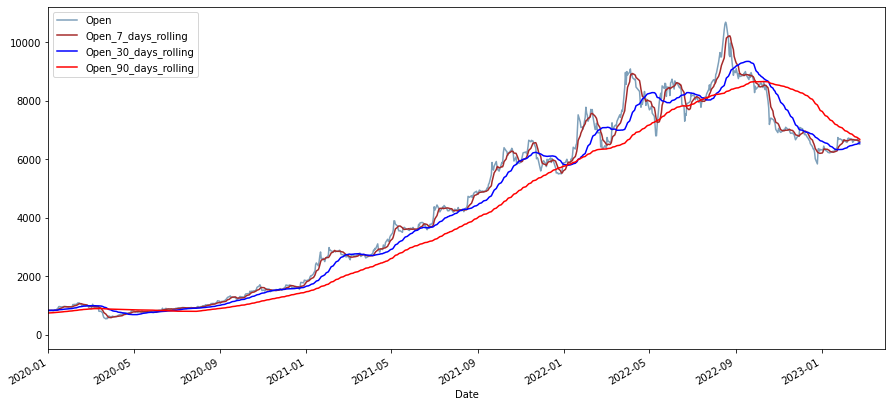

In [146]:
# rolling metrics smoothens the time series
df[["Open", "Open_7_days_rolling","Open_30_days_rolling","Open_90_days_rolling"]].plot(xlim=["2020-01-01","2023-04-01"],figsize=(15,7),color=["#7EA0BA","brown","blue","red"])
plt.show()

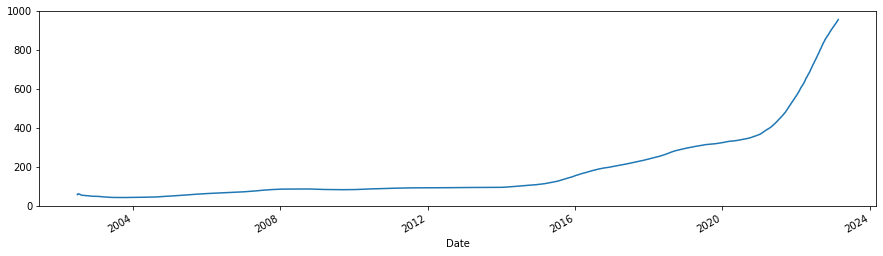

In [154]:
# expanding gives cumulative moving average
df_expanded = df["Open"].expanding().mean().plot(figsize=(15,4))

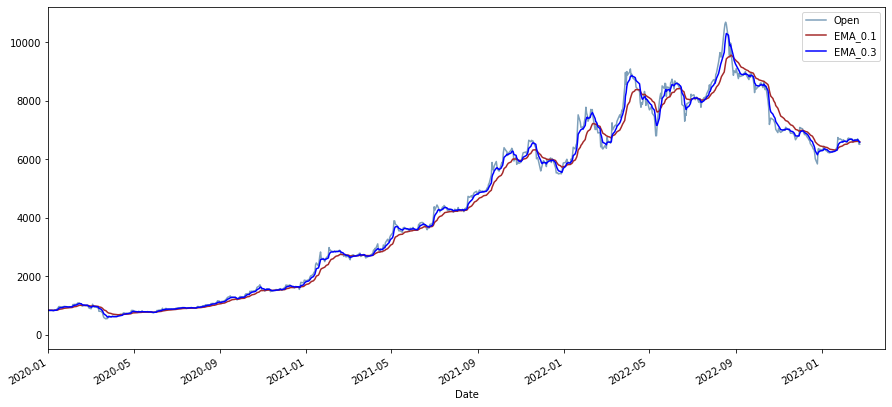

In [181]:
df["EMA_0.1"]=df["Open"].ewm(alpha=0.1, adjust=False).mean()
df["EMA_0.3"]=df["Open"].ewm(alpha=0.3, adjust=False).mean()

df[["Open", "EMA_0.1","EMA_0.3"]].plot(xlim=["2020-01-01","2023-04-01"],figsize=(15,7),color=["#7EA0BA","brown","blue"])
plt.show()